In [1]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\adit4\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [2]:
import numpy as np
import pandas as pd
df=pd.read_csv('spam.csv')
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [3]:
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],axis=1,inplace=True)
df.shape

(5572, 2)

In [4]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


## Small adjustments

In [5]:
df.rename(columns={'v1':"target","v2":"inputmsg"},inplace=True)

In [6]:
from sklearn.preprocessing import LabelEncoder as Encoder 
df.target=Encoder().fit_transform(df['target'])


In [7]:
df.isnull().sum()
df.duplicated().sum()
df.drop_duplicates(inplace=True,keep='first')

In [8]:
df.head(10)

,target,inputmsg
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
5,1,FreeMsg Hey there darling it's been 3 week's n...
6,0,Even my brother is not like to speak with me. ...
7,0,As per your request 'Melle Melle (Oru Minnamin...
8,1,WINNER!! As a valued network customer you have...
9,1,Had your mobile 11 months or more? U R entitle...


In [9]:
df.duplicated().sum()

0

## Analyzing
includes text processing and visualization of the data

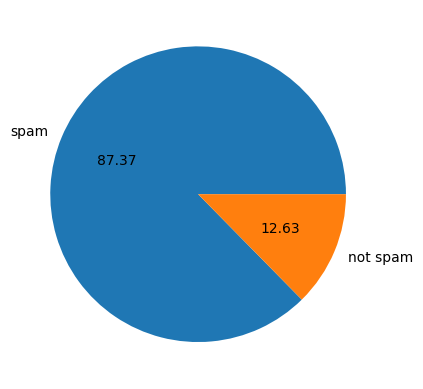

In [10]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(),labels=['spam','not spam'],autopct="%0.2f")
plt.show()

In [11]:
df['num_chars']=df.inputmsg.apply(len)

In [12]:
df.num_chars

0       111
1        29
2       155
3        49
4        61
       ... 
5567    160
5568     37
5569     57
5570    125
5571     26
Name: num_chars, Length: 5169, dtype: int64

In [13]:
df['num_words']=df.inputmsg.apply(lambda x:len(nltk.word_tokenize(x)))

In [14]:
df.num_words.sample(3)

2274    22
2707    33
4970    11
Name: num_words, dtype: int64

In [15]:
df['num_sen']=df['inputmsg'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [16]:
df.sample(10)

,target,inputmsg,num_chars,num_words,num_sen
4611,0,Sorry da. I gone mad so many pending works wha...,54,14,2
4271,0,Where to get those?,19,5,1
1722,0,Thought praps you meant another one. Goodo! I'...,63,13,3
1390,0,"I wonder how you got online, my love ? Had you...",155,38,5
992,0,Up to �_... �� wan come then come lor... But i...,73,19,2
2833,0,U sick still can go shopping?,29,7,1
3692,0,I was about to do it when i texted. I finished...,90,21,2
3590,0,How much would it cost to hire a hitman,39,9,1
1760,0,Nt yet chikku..simple habba..hw abt u?,38,11,1
1797,0,Can i get your opinion on something first?,42,9,1


In [17]:
df.describe()

,target,num_chars,num_words,num_sen
count,5169.000000,5169.000000,5169.000000,5169.000000
mean,0.126330,78.924163,18.456761,1.966531
std,0.332253,58.175349,13.325633,1.449833
min,0.000000,2.000000,1.000000,1.000000
25%,0.000000,36.000000,9.000000,1.000000
50%,0.000000,60.000000,15.000000,1.000000
75%,0.000000,117.000000,26.000000,2.000000
max,1.000000,910.000000,220.000000,38.000000


In [18]:
df[df['target']==0][['num_sen','num_words','num_chars']].describe()

,num_sen,num_words,num_chars
count,4516.000000,4516.000000,4516.000000
mean,1.820195,17.123782,70.457263
std,1.383657,13.493970,56.357463
min,1.000000,1.000000,2.000000
25%,1.000000,8.000000,34.000000
50%,1.000000,13.000000,52.000000
75%,2.000000,22.000000,90.000000
max,38.000000,220.000000,910.000000


In [19]:
df[df['target']==1][['num_sen','num_words','num_chars']].describe()

,num_sen,num_words,num_chars
count,653.000000,653.000000,653.000000
mean,2.978560,27.675345,137.479326
std,1.493185,7.011513,30.014336
min,1.000000,2.000000,13.000000
25%,2.000000,25.000000,131.000000
50%,3.000000,29.000000,148.000000
75%,4.000000,32.000000,157.000000
max,9.000000,46.000000,223.000000


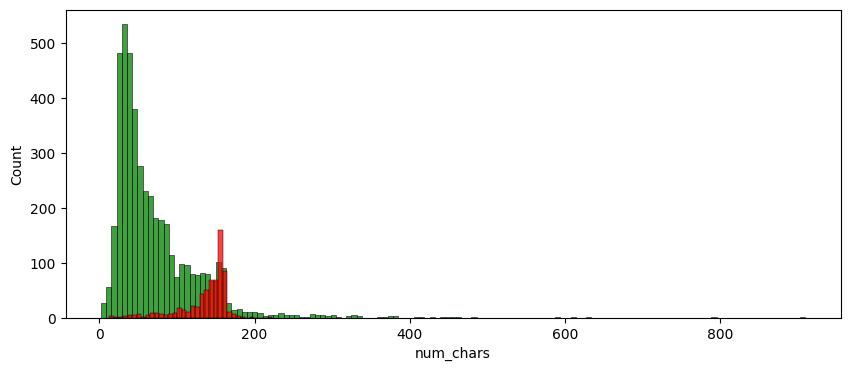

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10,4))
sns.histplot(df[df['target']==0]['num_chars'],color='green')
sns.histplot(df[df['target']==1]['num_chars'],color='red')
plt.show()

<Axes: xlabel='num_words', ylabel='Count'>

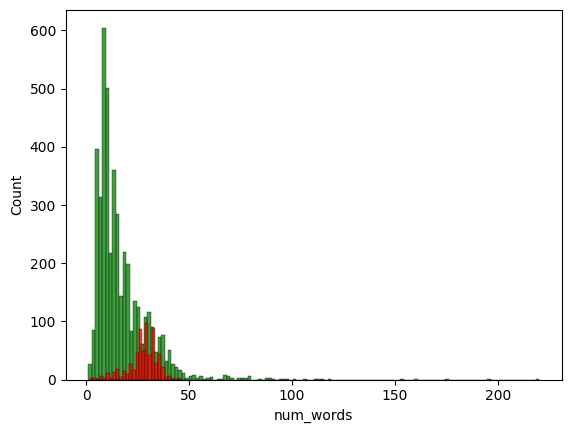

In [21]:
sns.histplot(df[df['target']==0]['num_words'],color='green')
sns.histplot(df[df['target']==1]['num_words'],color='red')

<Axes: >

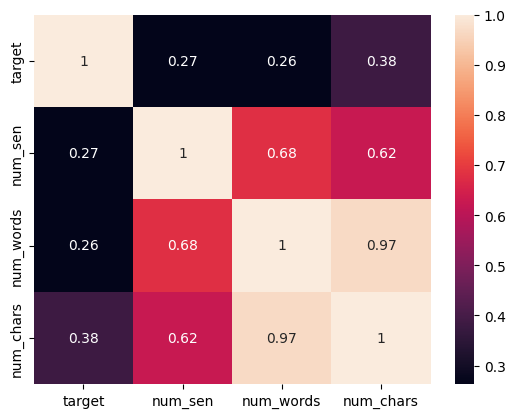

In [22]:
sns.heatmap(df.loc[:,['target','num_sen','num_words','num_chars']].corr(),annot=True)

In [23]:
from nltk import PorterStemmer as ps 
from nltk.corpus import stopwords
import re

In [24]:
df['copyofinput']=df['inputmsg']

In [25]:
def stem(obj):
    L=[]
    for i in obj.split():
        L.append(ps().stem(i))
    return " ".join(L)    

In [26]:
df.inputmsg=df.inputmsg.apply(stem)

In [27]:
df.inputmsg=df.inputmsg.apply(lambda obj: " ".join([word for word in obj.split() if word not in stopwords.words('english')]))

In [28]:
df.inputmsg.sample(10)

1595                      pl confirm time collect cheque.
5060                    sorry, i'll call later. meet sir.
3796    first time histori 'need' 'comfort' 'luxury' s...
3771                         doe uncl timi help clear car
5293                                    donno gene someth
5501    private! 2003 account statement 07808247860 sh...
423     urgent! mobil number ha award �2000 prize guar...
62                                          part check iq
97                              see. finish load loan pay
1223                   rofl betta invest anti age product
Name: inputmsg, dtype: object

In [29]:
df.inputmsg=df.inputmsg.apply(lambda x:re.sub(r'[^\w\s]','',x))

In [30]:
df.sample(10)

,target,inputmsg,num_chars,num_words,num_sen,copyofinput
1920,0,dont know bring food,29,6,1,Dont know you bring some food
463,0,sorry ill call later ok bye,29,8,1,"Sorry, I'll call later ok bye"
4781,0,call me senthil hsbc,32,9,1,"Call me, i am senthil from hsbc."
1294,0,aiyah u ok alreadi lar e nydc wheellock,48,12,2,Aiyah u did ok already lar. E nydc at wheellock?
1608,0,freez home yet rememb kiss mom morning love ...,152,37,6,Are your freezing ? Are you home yet ? Will yo...
484,0,chang fb jaykwon thuglyf falconerf,55,9,1,You should change your fb to jaykwon thuglyfe ...
3885,0,same im great aunt anniversari parti tarpon sp...,63,13,1,"Same, I'm at my great aunts anniversary party ..."
917,0,peopl see msgs think iam addict msging wrong b...,148,32,3,"When people see my msgs, They think Iam addict..."
2450,0,kgive back thanks,23,7,1,K..give back my thanks.
2513,1,u nokia 6230 plu free digit camera thi u get u...,158,35,4,U have won a nokia 6230 plus a free digital ca...


## Words Analysing


In [31]:
from wordcloud import WordCloud
wc=WordCloud(height=600,width=600,min_font_size=20,background_color="white")

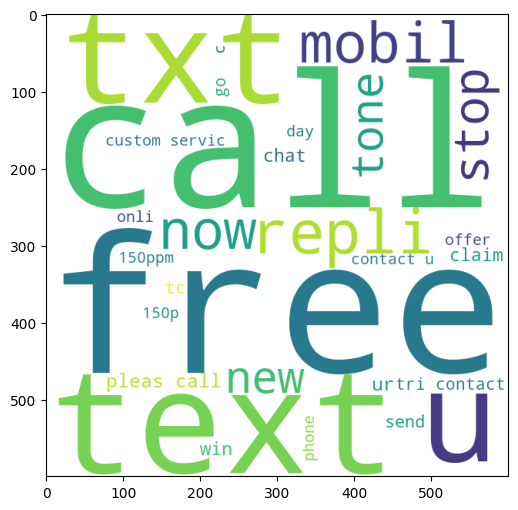

In [32]:
spam_wc=wc.generate(df[df['target']==1]['inputmsg'].str.cat(sep=' '))
plt.figure(figsize=(6,6))
plt.imshow(spam_wc)

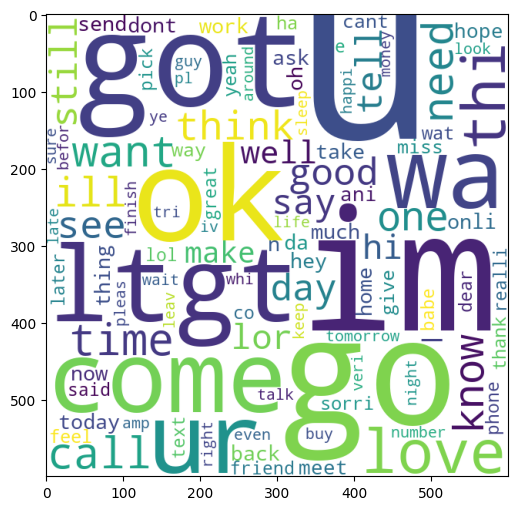

In [33]:
spam_wc=wc.generate(df[df['target']==0]['inputmsg'].str.cat(sep=' '))
plt.figure(figsize=(6,6))
plt.imshow(spam_wc)

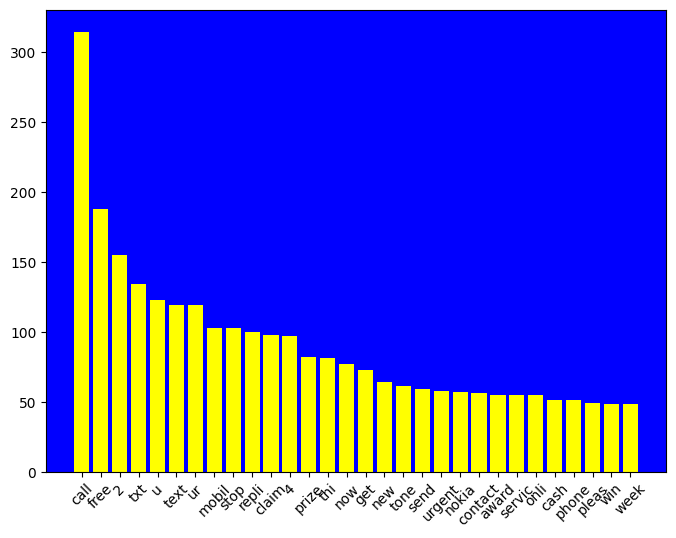

In [34]:
spam_words=[]
for sentence in df[df['target']==1]['inputmsg'].tolist():
    for i in sentence.split():
        spam_words.append(i)

from collections import Counter
spam_words_df=pd.DataFrame(Counter(spam_words).most_common(30),columns=['words','freq'])
# sns.barplot(spam_words_df)
# Counter(spam_words).most_common(30)
spam_words_df.head()
plt.figure(figsize=(8,6))
plt.bar(spam_words_df.words,spam_words_df.freq,facecolor='yellow')
plt.xticks(rotation=45)
ax = plt.gca()  # Get the current axes.
ax.set_facecolor('blue')  # Set the facecolor to the color you want.
plt.show()

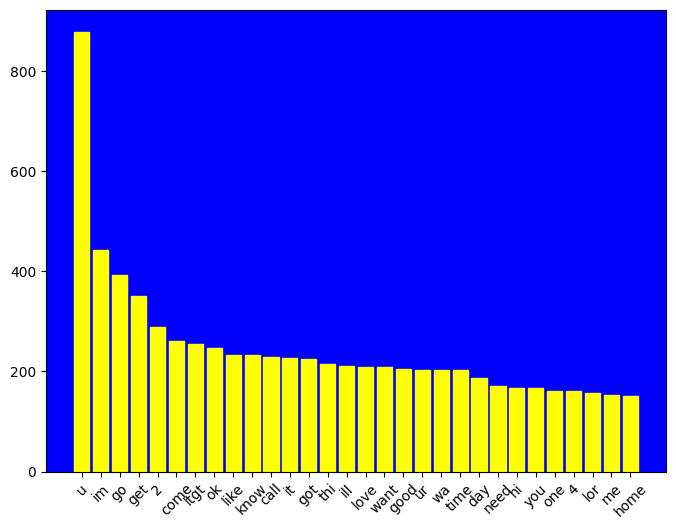

In [35]:
not_spam_words=[]
for sentence in df[df['target']==0]['inputmsg'].tolist():
    for i in sentence.split():
        not_spam_words.append(i)

from collections import Counter
not_spam_words_df=pd.DataFrame(Counter(not_spam_words).most_common(30),columns=['words','freq'])
# sns.barplot(not_spam_words_df)
# Counter(not_spam_words).most_common(30)
not_spam_words_df.head()
plt.figure(figsize=(8,6),facecolor="white")
plt.bar(not_spam_words_df.words,not_spam_words_df.freq,facecolor="yellow",edgecolor="yellow",color="blue")
plt.xticks(rotation=45)
ax = plt.gca()  # Get the current axes.
ax.set_facecolor('blue')  # Set the facecolor to the color you want.
plt.show()

## Vectorisation

In [36]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer(max_features=3000)
X_cv=cv.fit_transform(df['inputmsg']).toarray()
tfidf = TfidfVectorizer(max_features=3000)
X_tf = tfidf.fit_transform(df['inputmsg']).toarray()
y=df['target'].values


# Model Selection
includes trials of diff models

In [37]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score
X_tf_train,X_tf_test,y_tf_train,y_tf_test=train_test_split(X_tf,y,test_size=0.2,random_state=3)
X_cv_train,X_cv_test,y_cv_train,y_cv_test=train_test_split(X_cv,y,test_size=0.2,random_state=3)

In [38]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)
clfs = {
    'SVC' : svc,
    'KN' : knc, 
    'NB': mnb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc, 
    'BgC': bc, 
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [39]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    
    return accuracy,precision

In [40]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    
    current_accuracy,current_precision = train_classifier(clf, X_cv_train,y_cv_train,X_cv_test,y_cv_test)
    
    # print("For ",name)
    # print("Accuracy - ",current_accuracy)
    # print("Precision - ",current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)
performance_df_cv = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)


In [41]:
performance_df_cv.sample(10)

,Algorithm,Accuracy,Precision
3,DT,0.926499,0.921053
0,SVC,0.921663,0.752137
9,GBDT,0.943907,1.000000
8,ETC,0.969052,0.957627
7,BgC,0.955513,0.905172
2,NB,0.977756,0.920863
5,RF,0.965184,1.000000
1,KN,0.910058,1.000000
6,AdaBoost,0.957447,0.906780
10,xgb,0.967118,0.964912


In [42]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    
    current_accuracy,current_precision = train_classifier(clf, X_tf_train,y_tf_train,X_tf_test,y_tf_test)
    
    # print("For ",name)
    # print("Accuracy - ",current_accuracy)
    # print("Precision - ",current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)
performance_df_tf = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)


In [43]:
performance_df_tf.head(13)

,Algorithm,Accuracy,Precision
1,KN,0.909091,1.000000
5,RF,0.966151,1.000000
8,ETC,0.975822,1.000000
2,NB,0.970986,0.991071
9,GBDT,0.944874,0.988235
4,LR,0.952611,0.978947
0,SVC,0.973888,0.974790
10,xgb,0.968085,0.973451
7,BgC,0.966151,0.941176
6,AdaBoost,0.962282,0.939130


In [44]:
performance_df_cv.rename(columns={'Algo_cv':'Algorithm', 'Accuracy': 'Acc_cv', 'Precision': 'Prec_cv'}, inplace=True)


In [45]:
performance_df_tf.rename(columns={'Algo_tf':'Algorithm', 'Accuracy': 'Acc_tf', 'Precision': 'Prec_tf'}, inplace=True)

In [46]:
Combined_cv_tf_performance=performance_df_tf.merge(performance_df_cv,how='inner',on='Algorithm')
Combined_cv_tf_performance.sort_values(by='Acc_tf',ascending=False)

,Algorithm,Acc_tf,Prec_tf,Acc_cv,Prec_cv
2,ETC,0.975822,1.000000,0.969052,0.957627
6,SVC,0.973888,0.974790,0.921663,0.752137
3,NB,0.970986,0.991071,0.977756,0.920863
7,xgb,0.968085,0.973451,0.967118,0.964912
1,RF,0.966151,1.000000,0.965184,1.000000
8,BgC,0.966151,0.941176,0.955513,0.905172
9,AdaBoost,0.962282,0.939130,0.957447,0.906780
5,LR,0.952611,0.978947,0.966151,0.941176
4,GBDT,0.944874,0.988235,0.943907,1.000000
10,DT,0.939072,0.888889,0.926499,0.921053


In [47]:
etc.fit(X_tf_train,y_tf_train)
y_cv_pred=etc.predict(X_cv_test)
mnb.fit(X_cv_train,y_cv_train)
y_tf_pred=mnb.predict(X_tf_test)
accuracy_score(y_cv_test,y_cv_pred),accuracy_score(y_tf_test,y_tf_pred)

(0.9661508704061895, 0.9806576402321083)

In [48]:
import pickle as pk 
pk.dump(mnb,open('model.pkl','wb'))
pk.dump(tfidf,open('tfid.pkl','wb'))
import joblib
joblib.dump(etc,'modeletc.joblib')

['modeletc.joblib']

#### Example

In [49]:
input_sms='Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C'
input_sms=re.sub(r'[^\w\s]','',input_sms)
stopwords_list=stopwords.words('english')
input_words_list=input_sms.split()
filtered_words=[word for word in input_words_list if word not in stopwords_list]
l=[]
for i in filtered_words:
    l.append(ps().stem(i))
l=" ".join(l)
vector=tfidf.transform([l])
result=etc.predict(vector)[0]
result


1